In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# 1. Load the picture

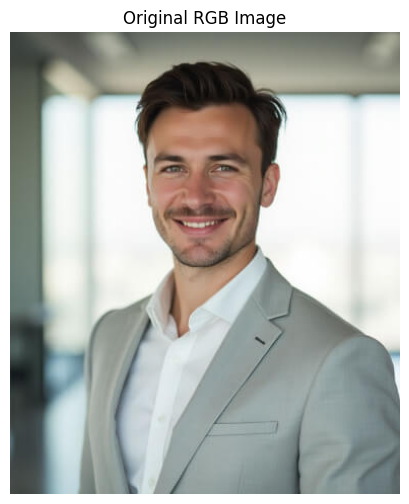

In [3]:
original_image = cv2.imread("Pic.jpg")
if original_image is None:
    print(f"Error: Could not load image.")

original_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)    

fig, ax1 = plt.subplots(figsize=(8, 6))  
ax1.imshow(original_rgb)
ax1.set_title('Original RGB Image')
ax1.axis('off')
plt.show()  

# 2. Convert RGB to Gray

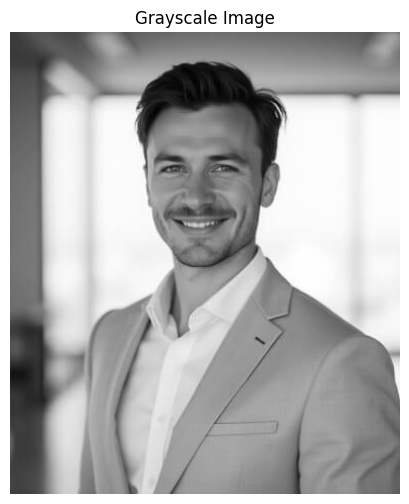

In [ ]:
gray_image = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2GRAY)

fig, ax2 = plt.subplots(figsize=(8, 6))  
ax2.imshow(gray_image, cmap='gray')
ax2.set_title('Grayscale Image')
ax2.axis('off')
plt.show()  

# 3. Convert Gray to Binary 

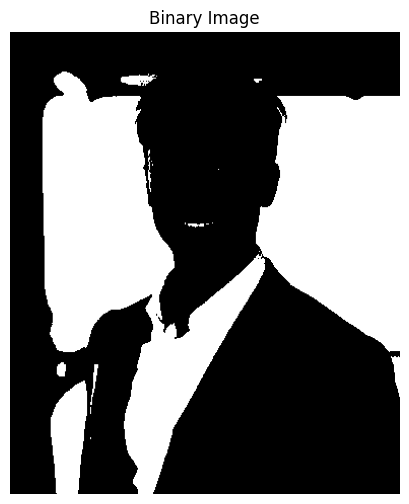

In [5]:
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, ax3 = plt.subplots(figsize=(8, 6))  
ax3.imshow(binary_image, cmap='gray')
ax3.set_title('Binary Image')
ax3.axis('off')
plt.show()

# 4. Convert color format to HSV

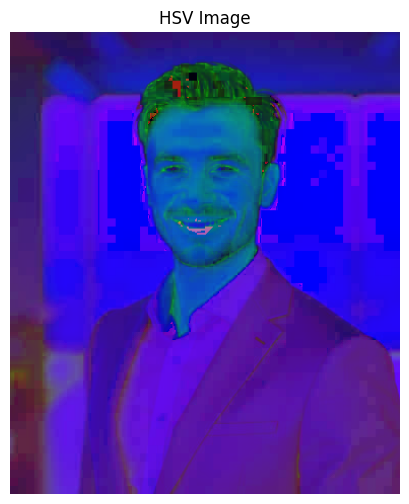

In [6]:
hsv_image = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2HSV)

fig, ax4 = plt.subplots(figsize=(8, 6))  
ax4.imshow(hsv_image)
ax4.set_title('HSV Image')
ax4.axis('off')
plt.show()

# 5. Divide RGB and HSV into its elements

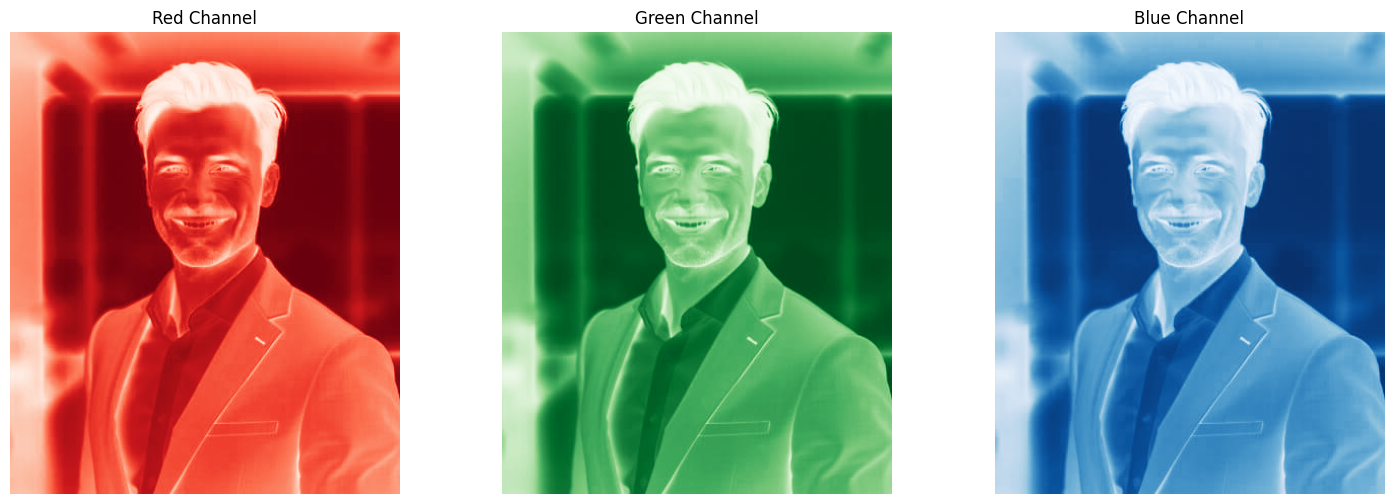

In [7]:
r_channel = original_rgb[:, :, 0]
g_channel = original_rgb[:, :, 1]
b_channel = original_rgb[:, :, 2]

fig, axs5 = plt.subplots(1, 3, figsize=(18, 6)) 

axs5[0].imshow(r_channel, cmap='Reds')
axs5[0].set_title('Red Channel')
axs5[0].axis('off')

axs5[1].imshow(g_channel, cmap='Greens')
axs5[1].set_title('Green Channel')
axs5[1].axis('off')

axs5[2].imshow(b_channel, cmap='Blues')
axs5[2].set_title('Blue Channel')
axs5[2].axis('off')

plt.show()

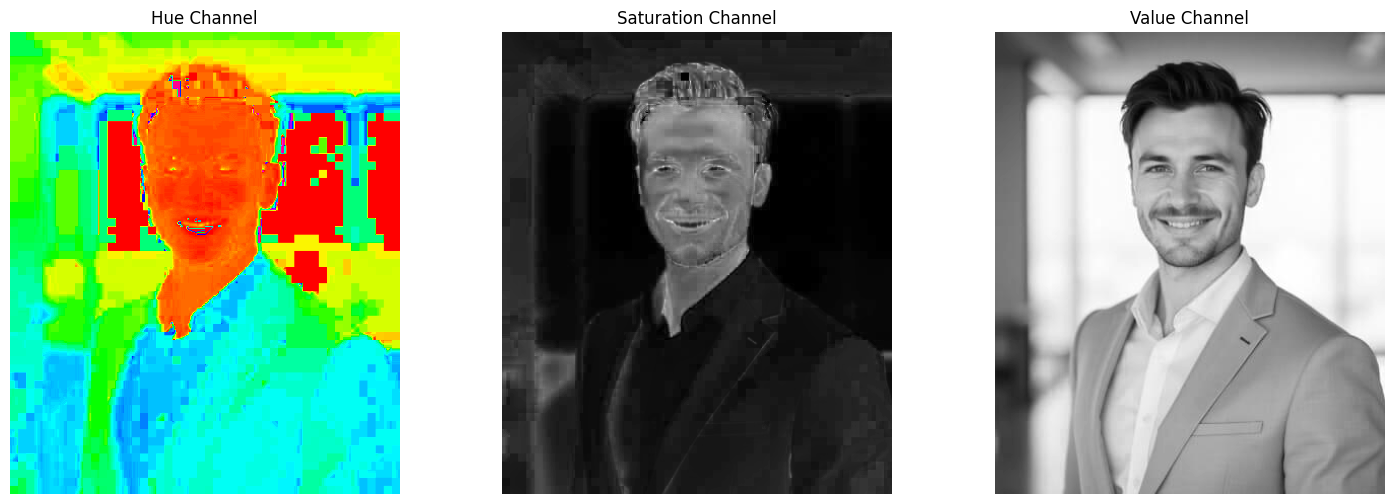

In [8]:
h_channel = hsv_image[:, :, 0]  
s_channel = hsv_image[:, :, 1]  
v_channel = hsv_image[:, :, 2]  

fig, axs5 = plt.subplots(1, 3, figsize=(18, 6))

axs5[0].imshow(h_channel / 180.0, cmap='hsv')
axs5[0].set_title('Hue Channel')
axs5[0].axis('off')

axs5[1].imshow(s_channel, cmap='gray')
axs5[1].set_title('Saturation Channel')
axs5[1].axis('off')

axs5[2].imshow(v_channel, cmap='gray')
axs5[2].set_title('Value Channel')
axs5[2].axis('off')

plt.show()

# 6. Draw histogram of picture

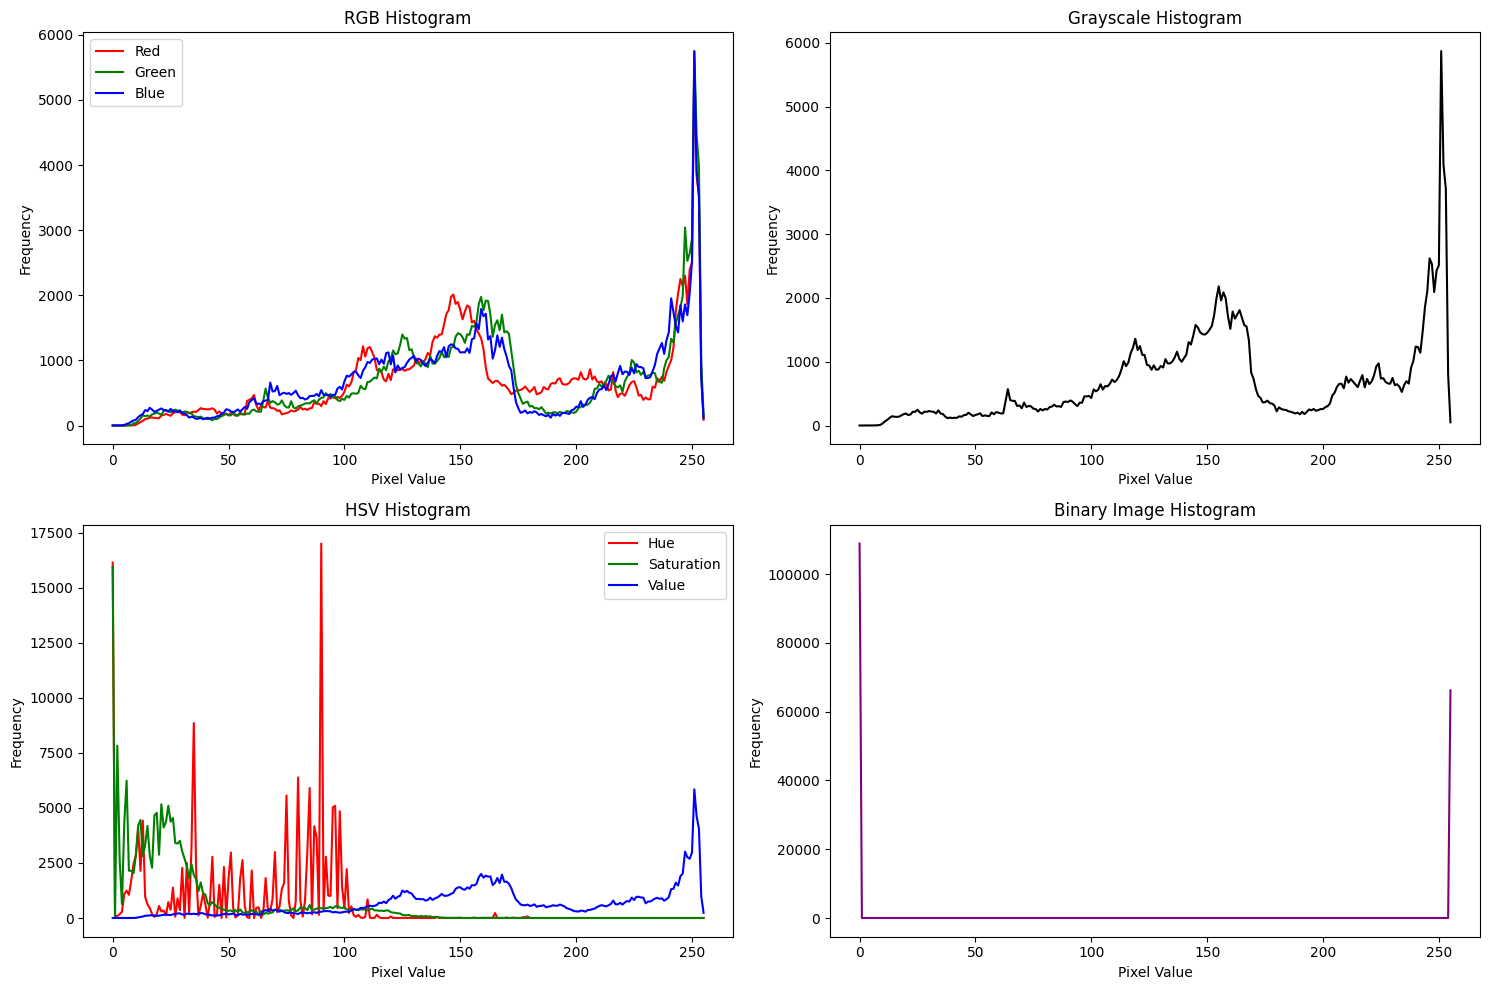

In [9]:
fig, axes6 = plt.subplots(2, 2, figsize=(15, 10))

# RGB histogram
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([original_rgb], [i], None, [256], [0, 256])
    axes6[0, 0].plot(hist, color=color)
axes6[0, 0].set_title('RGB Histogram')
axes6[0, 0].set_xlabel('Pixel Value')
axes6[0, 0].set_ylabel('Frequency')
axes6[0, 0].legend(['Red', 'Green', 'Blue'])

# Grayscale histogram
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
axes6[0, 1].plot(hist_gray, color='black')
axes6[0, 1].set_title('Grayscale Histogram')
axes6[0, 1].set_xlabel('Pixel Value')
axes6[0, 1].set_ylabel('Frequency')

# HSV histogram
hsv_colors = ('r', 'g', 'b')
hsv_labels = ['Hue', 'Saturation', 'Value']
for i in range(3):
    hist = cv2.calcHist([hsv_image], [i], None, [256], [0, 256])
    axes6[1, 0].plot(hist, color=hsv_colors[i])
axes6[1, 0].set_title('HSV Histogram')
axes6[1, 0].set_xlabel('Pixel Value')
axes6[1, 0].set_ylabel('Frequency')
axes6[1, 0].legend(hsv_labels)

# Binary histogram
hist_binary = cv2.calcHist([binary_image], [0], None, [256], [0, 256])
axes6[1, 1].plot(hist_binary, color='purple')
axes6[1, 1].set_title('Binary Image Histogram')
axes6[1, 1].set_xlabel('Pixel Value')
axes6[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()    

  # 7. Contrast of a Picture (Increase or decrease)

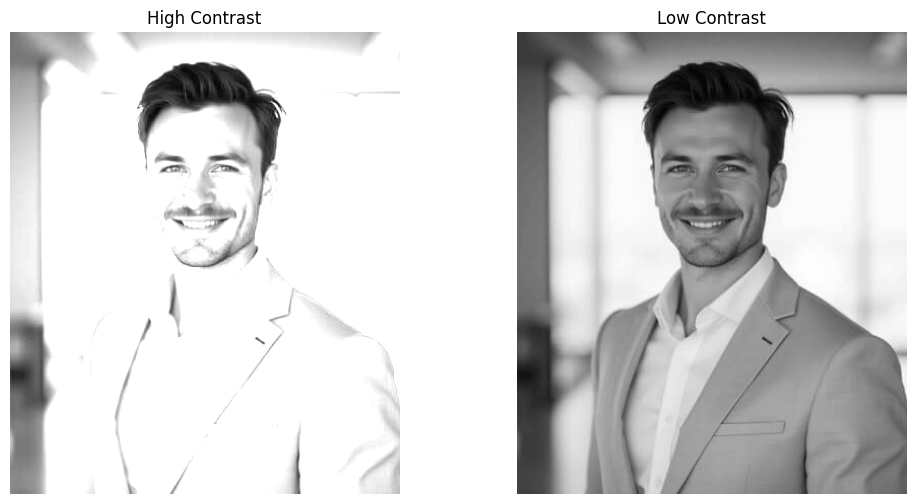

In [10]:
def adjust_contrast(image, alpha=1.5, beta=0):
        """
        Adjust contrast and brightness
        alpha: contrast control (1.0-3.0)
        beta: brightness control (0-100)
        """
        return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    
high_contrast = adjust_contrast(gray_image, alpha=2.0, beta=0)

low_contrast = adjust_contrast(gray_image, alpha=0.5, beta=0)

fig, axs7 = plt.subplots(1, 2, figsize=(12, 6))

axs7[0].imshow(high_contrast, cmap='gray')
axs7[0].set_title('High Contrast')
axs7[0].axis('off')

axs7[1].imshow(low_contrast, cmap='gray')
axs7[1].set_title('Low Contrast')
axs7[1].axis('off')

plt.show()

# 8. Histogram equalization

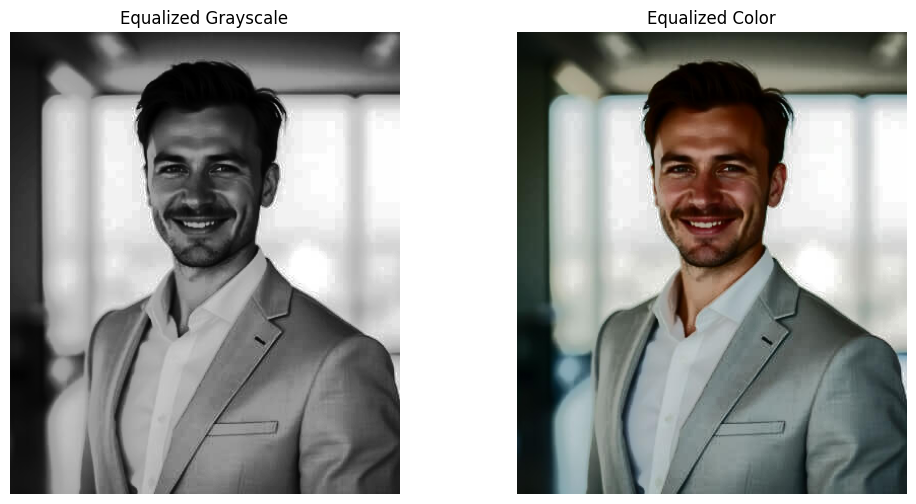

In [ ]:
equalized_gray = cv2.equalizeHist(gray_image)

ycrcb = cv2.cvtColor(original_rgb, cv2.COLOR_RGB2YCrCb) 
ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
equalized_color = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2RGB)

fig, axs8 = plt.subplots(1, 2, figsize=(12, 6))

axs8[0].imshow(equalized_gray, cmap='gray')
axs8[0].set_title('Equalized Grayscale')
axs8[0].axis('off')

axs8[1].imshow(equalized_color)
axs8[1].set_title('Equalized Color')
axs8[1].axis('off')

plt.show()

# 9. Histogram stretching

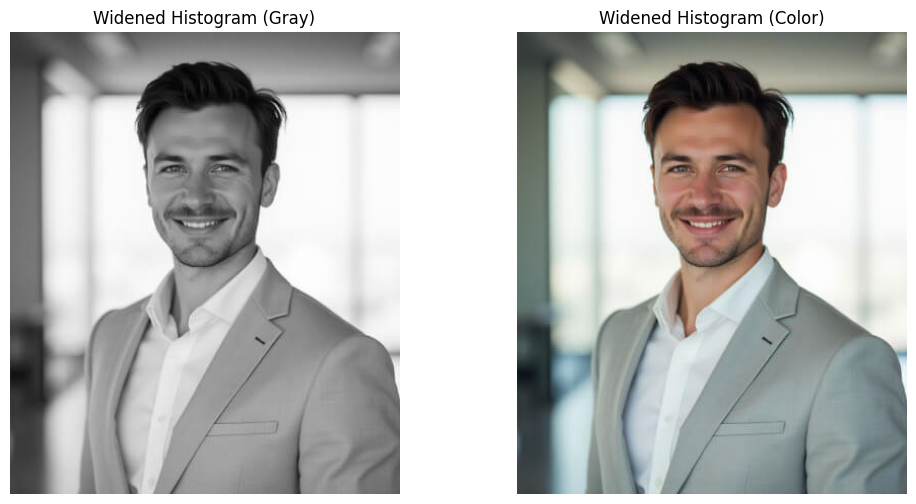

In [12]:
def widen_histogram(image):
    # For grayscale images
    if len(image.shape) == 2:
        min_val = np.min(image)
        max_val = np.max(image)
        stretched = ((image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    else:
        # For color images, stretch each channel
        stretched = np.zeros_like(image)
        for i in range(3):
            min_val = np.min(image[:, :, i])
            max_val = np.max(image[:, :, i])
            stretched[:, :, i] = ((image[:, :, i] - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    return stretched

widened_gray = widen_histogram(gray_image)
widened_color = widen_histogram(original_rgb)


fig, axs9 = plt.subplots(1, 2, figsize=(12, 6))

axs9[0].imshow(widened_gray, cmap='gray')
axs9[0].set_title('Widened Histogram (Gray)')
axs9[0].axis('off')

axs9[1].imshow(widened_color)
axs9[1].set_title('Widened Histogram (Color)')
axs9[1].axis('off')

plt.show()

# 10. Salt-and-Pepper Noise

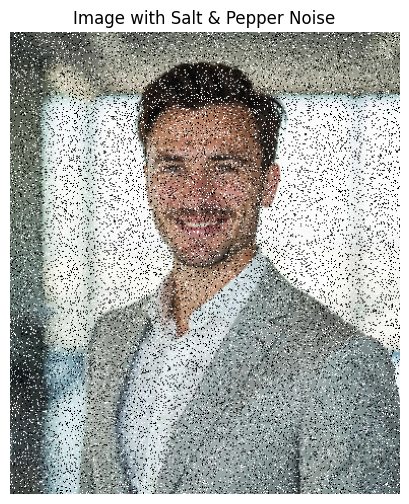

In [20]:
def add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy_image = np.copy(image)
    salt_mask = np.random.random(image.shape[:2]) < salt_prob
    if len(image.shape) == 3:  
        noisy_image[salt_mask] = [255, 255, 255]
    else:  
        noisy_image[salt_mask] = 255
    
    pepper_mask = np.random.random(image.shape[:2]) < pepper_prob
    if len(image.shape) == 3:  
        noisy_image[pepper_mask] = [0, 0, 0]
    else:  
        noisy_image[pepper_mask] = 0
    
    return noisy_image


noisy_image = add_salt_pepper_noise(original_rgb, salt_prob=0.1, pepper_prob=0.1)

fig, ax10 = plt.subplots(figsize=(8, 6))  
ax10.imshow(noisy_image)
ax10.set_title('Image with Salt & Pepper Noise')
ax10.axis('off')
plt.show()

# 11. Mean Filter

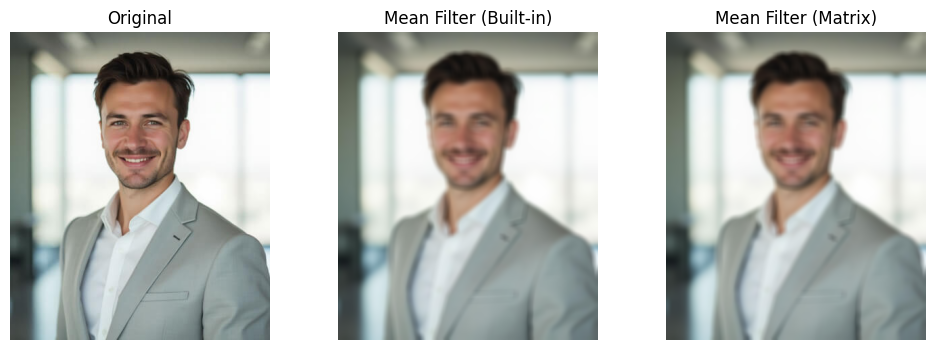

In [14]:
def mean_filter_builtin(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))

def mean_filter_matrix(image, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    return cv2.filter2D(image, -1, kernel)


mean_builtin = mean_filter_builtin(original_rgb, 9)
mean_matrix = mean_filter_matrix(original_rgb, 9)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mean_builtin, cmap='gray')
plt.title('Mean Filter (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mean_matrix, cmap='gray')
plt.title('Mean Filter (Matrix)')
plt.axis('off')
plt.show()

# 12. Gaussian Filter

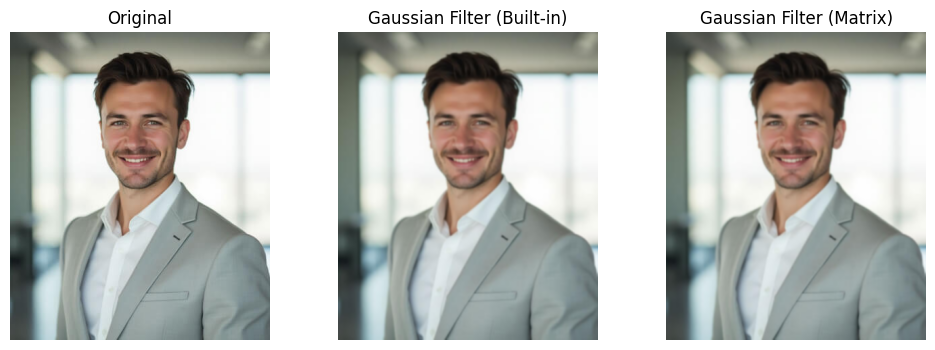

In [15]:
def gaussian_filter_builtin(image, kernel_size=5, sigma=1.0):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def gaussian_filter_matrix(image, kernel_size=5, sigma=1.0):
    ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    kernel = kernel / np.sum(kernel) 
    return cv2.filter2D(image, -1, kernel)


gaussian_builtin = gaussian_filter_builtin(original_rgb, 11, 1.0)
gaussian_matrix = gaussian_filter_matrix(original_rgb, 11, 1.0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(original_rgb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_builtin, cmap='gray')
plt.title('Gaussian Filter (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_matrix, cmap='gray')
plt.title('Gaussian Filter (Matrix)')
plt.axis('off')
plt.show()

# 13. Median Filter

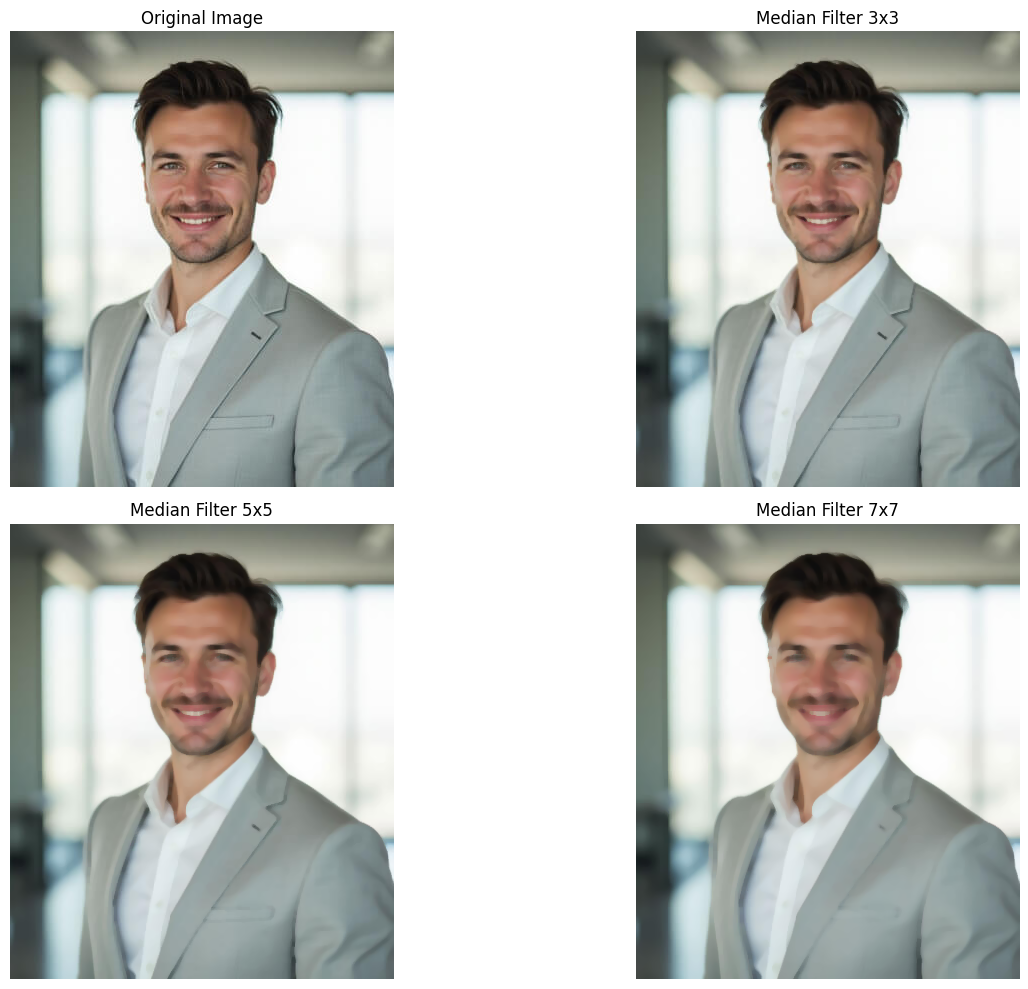

In [ ]:
def apply_median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

filtered_3x3 = apply_median_filter(original_rgb, 3)
filtered_5x5 = apply_median_filter(original_rgb, 5)
filtered_7x7 = apply_median_filter(original_rgb, 7)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(filtered_3x3)
plt.title('Median Filter 3x3')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(filtered_5x5)
plt.title('Median Filter 5x5')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(filtered_7x7)
plt.title('Median Filter 7x7')
plt.axis('off')

plt.tight_layout()
plt.show()

# 14. Removing Salt-and-Pepper Noise with Mean, Median, and Gaussian Filter

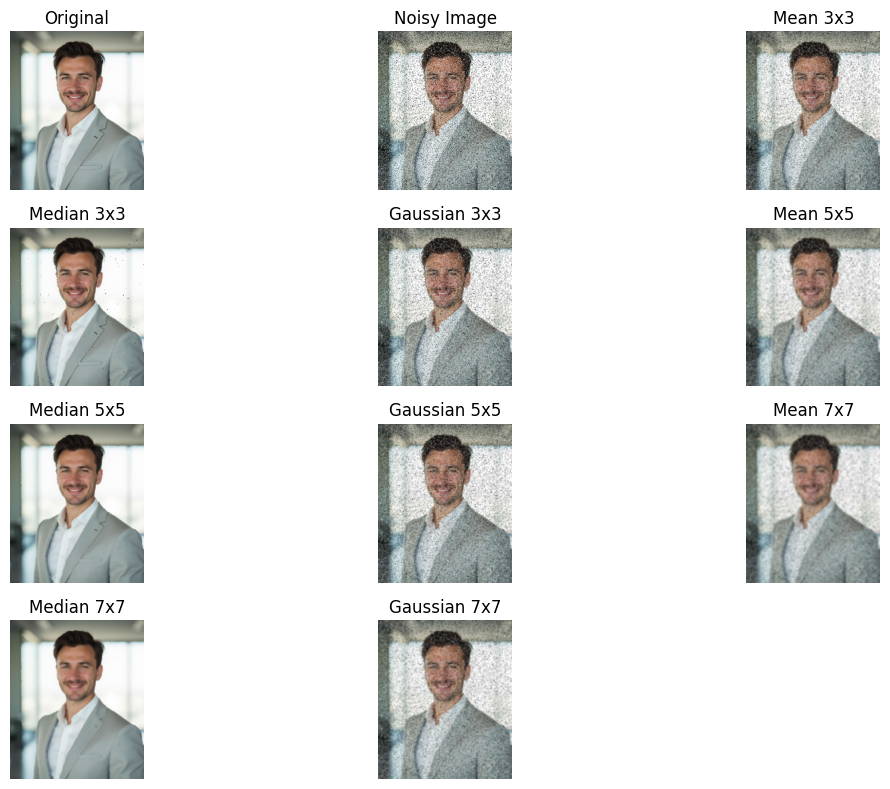

In [27]:
noisy = add_salt_pepper_noise(original_rgb, salt_prob=0.1, pepper_prob=0.1)

filters_comparison = []

# Small kernel 
filters_comparison.append(('Mean 3x3', cv2.blur(noisy, (3, 3))))
filters_comparison.append(('Median 3x3', cv2.medianBlur(noisy, 3)))
filters_comparison.append(('Gaussian 3x3', cv2.GaussianBlur(noisy, (3, 3), 0)))

# Medium kernel 
filters_comparison.append(('Mean 5x5', cv2.blur(noisy, (5, 5))))
filters_comparison.append(('Median 5x5', cv2.medianBlur(noisy, 5)))
filters_comparison.append(('Gaussian 5x5', cv2.GaussianBlur(noisy, (5, 5), 0)))

# Large kernel 
filters_comparison.append(('Mean 7x7', cv2.blur(noisy, (7, 7))))
filters_comparison.append(('Median 7x7', cv2.medianBlur(noisy, 7)))
filters_comparison.append(('Gaussian 7x7', cv2.GaussianBlur(noisy, (7, 7), 0)))

plt.figure(figsize=(12, 8))

plt.subplot(4, 3, 1)
plt.imshow(original_rgb, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

for i, (title, filtered_img) in enumerate(filters_comparison, 3):
    plt.subplot(4, 3, i)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 15. Canny Edge Detection

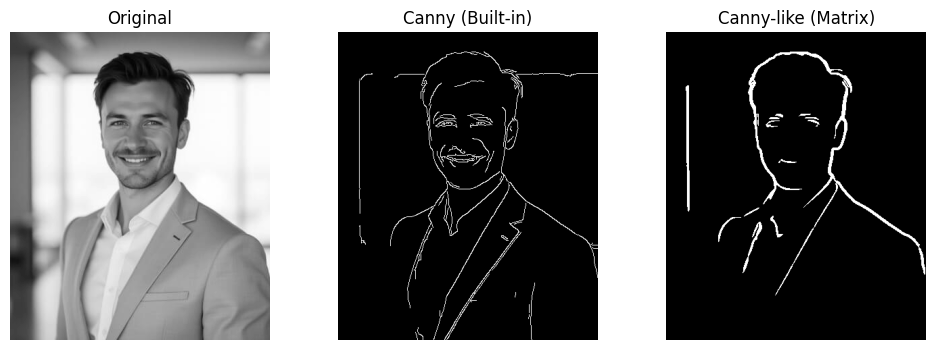

In [16]:
def canny_builtin(image, threshold1=100, threshold2=200):
    return cv2.Canny(image, threshold1, threshold2)

def canny_matrix_manual(image, low_threshold=100, high_threshold=200):
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x) * 180 / np.pi
    edges = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0]-1):
        for j in range(1, magnitude.shape[1]-1):
            if magnitude[i, j] > high_threshold:
                edges[i, j] = 255
            elif magnitude[i, j] > low_threshold:
                if np.any(edges[i-1:i+2, j-1:j+2] == 255):
                    edges[i, j] = 255
    
    return edges.astype(np.uint8)


canny_builtin = canny_builtin(gray_image)
canny_matrix = canny_matrix_manual(gray_image)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(canny_builtin, cmap='gray')
plt.title('Canny (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_matrix, cmap='gray')
plt.title('Canny-like (Matrix)')
plt.axis('off')
plt.show()

# 16. Sobel Filter

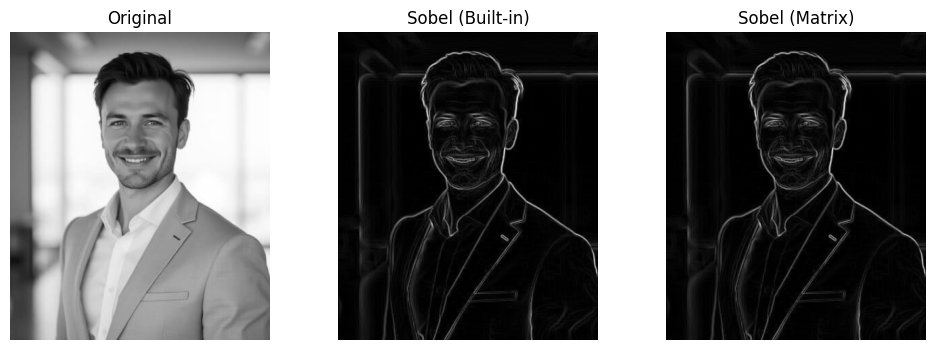

In [17]:
def sobel_builtin(image, direction='both'):
    if direction == 'x':
        return cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    elif direction == 'y':
        return cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    else:  
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        return np.sqrt(sobel_x**2 + sobel_y**2)

def sobel_matrix_manual(image, direction='both'):
    sobel_x_kernel = np.array([[-1, 0, 1],
                              [-2, 0, 2],
                              [-1, 0, 1]], dtype=np.float32)
    
    sobel_y_kernel = np.array([[-1, -2, -1],
                              [0, 0, 0],
                              [1, 2, 1]], dtype=np.float32)
    
    if direction == 'x':
        return cv2.filter2D(image.astype(np.float32), -1, sobel_x_kernel)
    elif direction == 'y':
        return cv2.filter2D(image.astype(np.float32), -1, sobel_y_kernel)
    else:  
        grad_x = cv2.filter2D(image.astype(np.float32), -1, sobel_x_kernel)
        grad_y = cv2.filter2D(image.astype(np.float32), -1, sobel_y_kernel)
        return np.sqrt(grad_x**2 + grad_y**2)


sobel_builtin_result = sobel_builtin(gray_image, 'both')
sobel_matrix_result = sobel_matrix_manual(gray_image, 'both')

sobel_builtin_norm = cv2.normalize(sobel_builtin_result, None, 0, 255, cv2.NORM_MINMAX)
sobel_matrix_norm = cv2.normalize(sobel_matrix_result, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_builtin_norm, cmap='gray')
plt.title('Sobel (Built-in)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_matrix_norm, cmap='gray')
plt.title('Sobel (Matrix)')
plt.axis('off')
plt.show()

# 17. Laplacian Filter 

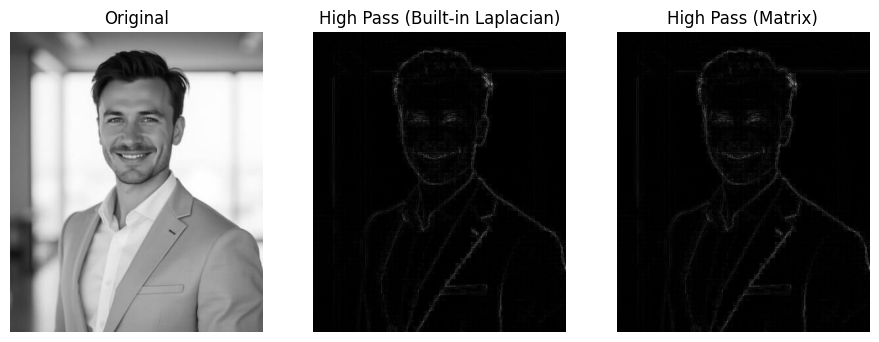

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_builtin(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def laplacian_matrix_manual(image):
    laplacian_kernel = np.array([[0, -1, 0],
                                [-1, 4, -1],
                                [0, -1, 0]], dtype=np.float32)
    
    # laplacian_kernel = np.array([[-1, -1, -1],
    #                              [-1, 8, -1],
    #                              [-1, -1, -1]], dtype=np.float32)
    
    return cv2.filter2D(image.astype(np.float32), -1, laplacian_kernel)


laplacian_builtin_result = laplacian_builtin(gray_image)
highpass_matrix_result = laplacian_matrix_manual(gray_image)

laplacian_builtin_norm = cv2.normalize(np.abs(laplacian_builtin_result), None, 0, 255, cv2.NORM_MINMAX)
highpass_matrix_norm = cv2.normalize(np.abs(highpass_matrix_result), None, 0, 255, cv2.NORM_MINMAX)

# Display results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(laplacian_builtin_norm, cmap='gray')
plt.title('High Pass (Built-in Laplacian)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(highpass_matrix_norm, cmap='gray')
plt.title('High Pass (Matrix)')
plt.axis('off')

plt.show()

# 18. Video Processing 

In [28]:
def quick_process_video(input_video_path, output_video_path, salt_prob=0.02, pepper_prob=0.02):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {input_video_path}")
        return False
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Input Video: {total_frames} frames, {fps} FPS, {width}x{height}")
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
    frame_count = 0
    print("Processing video frames...")
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            break
        
        noisy_frame = add_salt_pepper_noise(frame, salt_prob, pepper_prob)
        
        out.write(noisy_frame)
        
        frame_count += 1
        
        if frame_count % 100 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...")
    
    cap.release()
    out.release()
    
    print(f"Processing complete!")
    print(f"Output video: {output_video_path}")
    print(f"Total frames processed: {frame_count}")
    return True


input_vid = "Original_Vid.mp4"  
output_vid = "Noisy_Vid.mp4"
quick_process_video(input_vid, output_vid, salt_prob=0.05, pepper_prob=0.05)

Input Video: 545 frames, 30.0 FPS, 640x360
Processing video frames...
Processed 100/545 frames...
Processed 200/545 frames...
Processed 300/545 frames...
Processed 400/545 frames...
Processed 500/545 frames...
Processing complete!
Output video: Noisy_Vid.mp4
Total frames processed: 545


True